In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame

url ="https://www.psx.com.pk/market-summary/"

ss = requests.get(url)
print(ss)
obj = BeautifulSoup(ss.content,'lxml')
# obj.text


<Response [200]>


In [2]:
data = obj.findAll("div",{"class":"table-responsive"})

In [3]:
rows = obj.find_all('td')
row_data = []
for i in range(30,len(rows)):
    row_data.append(rows[i].text)

row1 = row_data[8:16:1]
j = 4   #row nUm
k = 8   #slicing start index
l = 16    #slicing end index
row4 = []
for i in range(k,len(row_data)):
    
    k =l
    l=l+8
    row4.append(row_data[k:l:1])
    



In [4]:
row4

[['Atlas Honda Limited. ',
  '395.83',
  '381.00',
  '381',
  '381',
  '381',
  '  -14.83',
  '100'],
 ['Dewan Farooque Motors Limited [ DEFAULTER SEGMENT ]',
  '7.35',
  '7.35',
  '7.35',
  '7.04',
  '7.06',
  '  -.29',
  '140,000'],
 ['Ghandhara Industries Ltd. ',
  '138.60',
  '140.00',
  '140.49',
  '134',
  '134.91',
  '  -3.69',
  '417,400'],
 ['Ghandhara Nissan Ltd. ',
  '78.20',
  '78.50',
  '78.5',
  '75.11',
  '75.79',
  '  -2.41',
  '188,500'],
 ['Ghani Automobile Industries Ltd. ',
  '5.16',
  '5.15',
  '5.15',
  '4.9',
  '4.99',
  '  -.17',
  '210,500'],
 ['Hino Pak Motor Limeted. ',
  '484.99',
  '470.00',
  '488.98',
  '470',
  '472',
  '  -12.99',
  '400'],
 ['Honda Atlas Cars (Pak) Ltd. ',
  '220.49',
  '221.99',
  '223',
  '215.61',
  '216.47',
  '  -4.02',
  '125,800'],
 ['Indus Motor Company Ltd. ',
  '1,198.00',
  '1200.00',
  '1200',
  '1166',
  '1189.99',
  '  -8.01',
  '6,180'],
 ['Millat Tractors Limited. ',
  '711.45',
  '712.01',
  '723',
  '708.05',
  '711.3

In [5]:
import pandas as pd


In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [6]:
filtered_rows = []
for row in row4:
    if(row not in filtered_rows):
        filtered_rows.append(row)
    else:
        continue

In [7]:
len(filtered_rows)

379

In [41]:
# for i in range(len(filtered_rows)):
#     if(filtered_rows[i][0] == 'SCRIP'):
#         filtered_rows.remove(filtered_rows[i])

In [8]:
# len(row4)
import csv


In [9]:
for i in range(len(filtered_rows)):
    print(filtered_rows[i])

['Atlas Honda Limited. ', '395.83', '381.00', '381', '381', '381', '  -14.83', '100']
['Dewan Farooque Motors Limited [ DEFAULTER SEGMENT ]', '7.35', '7.35', '7.35', '7.04', '7.06', '  -.29', '140,000']
['Ghandhara Industries Ltd. ', '138.60', '140.00', '140.49', '134', '134.91', '  -3.69', '417,400']
['Ghandhara Nissan Ltd. ', '78.20', '78.50', '78.5', '75.11', '75.79', '  -2.41', '188,500']
['Ghani Automobile Industries Ltd. ', '5.16', '5.15', '5.15', '4.9', '4.99', '  -.17', '210,500']
['Hino Pak Motor Limeted. ', '484.99', '470.00', '488.98', '470', '472', '  -12.99', '400']
['Honda Atlas Cars (Pak) Ltd. ', '220.49', '221.99', '223', '215.61', '216.47', '  -4.02', '125,800']
['Indus Motor Company Ltd. ', '1,198.00', '1200.00', '1200', '1166', '1189.99', '  -8.01', '6,180']
['Millat Tractors Limited. ', '711.45', '712.01', '723', '708.05', '711.35', '  -.1', '62,800']
['Pak Suzuki Motors Co Ltd. ', '237.06', '239.00', '239.8', '230.01', '230.97', '  -6.09', '127,400']
['Sazgar Engin

In [10]:
with open('Stocks.csv','a') as csv_file:
    spamwriter = csv.writer(csv_file)
    spamwriter.writerows(filtered_rows)

In [11]:
with open('Stocks.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    rows = list(csv_reader)
    

In [3]:
filter = ['SCRIP','LDCP','OPEN','HIGH','LOW','CURRENT','CHANGE','VOLUME']
filter

['SCRIP', 'LDCP', 'OPEN', 'HIGH', 'LOW', 'CURRENT', 'CHANGE', 'VOLUME']

In [13]:
for i in range(0,len(rows)):
    
    if(filter[0] in rows[i]):
        continue
    else:
        with open('Stock.csv','a') as csv_file:
            spamwriter = csv.writer(csv_file)
            spamwriter.writerow(rows[i])
            
        

In [14]:
data = pd.read_csv('Stock.csv',names=filter)

/home/ashan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
data.head()

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,45500
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,58500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,16500


In [417]:
data.tail()


,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
128923,SSGC-JAN,21.80,21.94,22.50,21.77,22.45,0.65,"657,500"
128924,SEARL-JAN,191.02,190.25,196.00,190.21,195.63,4.61,"854,000"
128925,TRG-JAN,24.78,24.99,26.01,24.80,26.01,1.23,"7,665,500"
128926,UBL-JAN,166.73,171.00,172.50,170.00,172.29,5.56,"8,000"
128927,UNITY-JAN,16.30,16.30,17.10,16.22,17.02,0.72,"15,338,000"


In [363]:
data.describe()

,OPEN,HIGH,LOW,CURRENT,CHANGE
count,69308.000000,69308.000000,69308.000000,69308.000000,69308.000000
mean,135.570505,138.984094,135.369384,139.479647,1.141959
std,516.954776,530.137168,517.589139,538.773694,17.502594
min,0.000000,0.000000,0.000000,0.350000,-345.000000
25%,10.710000,11.240000,10.650000,11.030000,-0.250000
50%,30.000000,31.300000,30.000000,31.000000,0.080000
75%,101.400000,102.800000,100.502500,102.000000,1.000000
max,8800.000000,8800.000000,8100.000000,8505.000000,380.000000


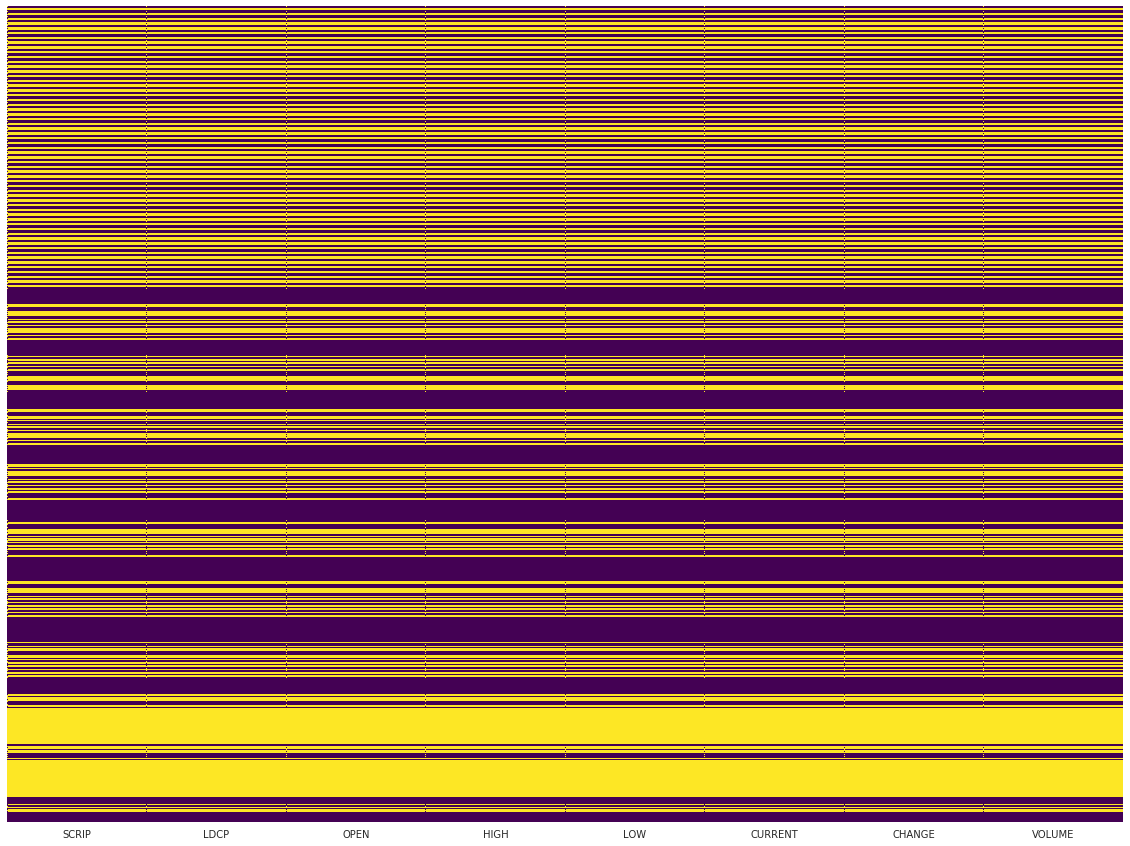

In [365]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [366]:
data.size

1007304

In [162]:
# import pandas_profiling

In [547]:
# pandas_profiling.ProfileReport(data)

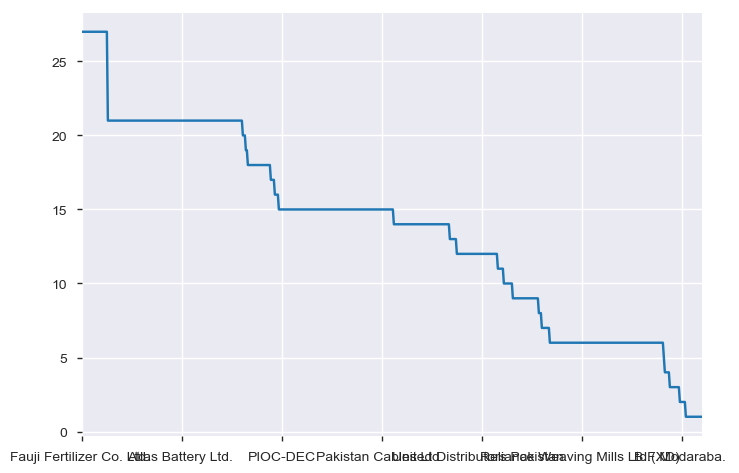

In [29]:
# data['SCRIP'].value_counts().plot(kind='line')

In [40]:
corr = data.corr()
corr
# ax = sb.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sb.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

,OPEN,HIGH,LOW,CURRENT,CHANGE
OPEN,1.000000,0.982648,0.982006,0.966719,0.441359
HIGH,0.982648,1.000000,0.999745,0.983952,0.436540
LOW,0.982006,0.999745,1.000000,0.983781,0.433598
CURRENT,0.966719,0.983952,0.983781,1.000000,0.432580
CHANGE,0.441359,0.436540,0.433598,0.432580,1.000000


In [27]:
data["SCRIP"].unique()`

array(['Dewan Farooque Motors Limited [ DEFAULTER SEGMENT ]',
       'Ghandhara Nissan Ltd. ', 'Ghani Automobile Industries Ltd. ',
       'Hino Pak Motor Limeted. ', 'Honda Atlas Cars (Pak) Ltd. ',
       'Indus Motor Company Ltd.(XD) ', 'Millat Tractors Limited.(XDXB) ',
       'Pak Suzuki Motors Co Ltd. ', 'Agriautos Industries Co. Ltd.(XD) ',
       'Atlas Battery Ltd. ', 'Baluchistan Wheels Ltd.(XD) ',
       'Exide Pakistan Ltd. ', 'General Tyre & Rubber Co.(XB) ',
       'Loads Limited. ', 'Thal Limited.(XD) ', 'EMCO Industries Ltd. ',
       'Pak Elektron Ltd. ', 'Siemens (Pak) Eng. Co. Ltd. ',
       'WAVES Singer Pakistan Ltd.(XB) ', 'Attock Cement Pak Ltd. ',
       'Bestway Cement Limited. ', 'Cherat Cement Co. Ltd.(XDXB) ',
       'D. G. Khan Cement Co. Ltd.(XD) ', 'Dewan Cement Limited. ',
       'Fauji Cement Co Ltd. ', 'Fecto Cement Ltd.(XD) ',
       'Flying Cement Company Ltd. ', 'Gharibwal Cement Ltd.(XD) ',
       'Javedan Corporation Ltd.(XB) ', 'Kohat Cement Co. L

In [1]:
import pandas as pd

In [4]:
d = pd.read_csv('Stock.csv',names=filter,skip_blank_lines=True)

/home/ashan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
# def delete_empty_rows(filepath, new_file_path):
#     data = pd.read_csv(filepath, skip_blank_lines=True)
#     data.dropna(how="all", inplace=True)
#     data.to_csv(new_file_path, header=True)

In [120]:
# delete_empty_rows('Stocks.csv','modified_stocks.csv')

In [119]:
# frame = pd.read_csv('modified_stocks.csv',infer_datetime_format=True)

In [5]:
d

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,45500
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,58500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,16500
...,...,...,...,...,...,...,...,...
132691,SSGC-JAN,23.03,23.03,23.03,22.27,22.70,-0.33,"522,000"
132692,SEARL-JAN,201.54,202.05,202.50,195.51,196.80,-4.74,"834,000"
132693,TRG-JAN,27.31,27.98,28.67,26.90,28.41,1.10,"18,846,500"
132694,UBL-JAN,179.73,180.00,181.01,175.00,177.17,-2.56,"68,500"


In [6]:
d.isnull().sum()

SCRIP      58175
LDCP       58175
OPEN       58175
HIGH       58175
LOW        58175
CURRENT    58175
CHANGE     58175
VOLUME     58175
dtype: int64

In [6]:
print((d.isnull()))

        SCRIP   LDCP   OPEN   HIGH    LOW  CURRENT  CHANGE  VOLUME
0       False  False  False  False  False    False   False   False
1        True   True   True   True   True     True    True    True
2       False  False  False  False  False    False   False   False
3        True   True   True   True   True     True    True    True
4       False  False  False  False  False    False   False   False
...       ...    ...    ...    ...    ...      ...     ...     ...
122893  False  False  False  False  False    False   False   False
122894  False  False  False  False  False    False   False   False
122895  False  False  False  False  False    False   False   False
122896  False  False  False  False  False    False   False   False
122897  False  False  False  False  False    False   False   False

[122898 rows x 8 columns]


In [7]:
d = d.dropna()

In [8]:
d.reset_index(inplace=True)

In [9]:
d.drop('index', axis='columns', inplace=True)

/home/ashan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
d.head(20)

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,45500
1,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,58500
2,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,16500
3,Hino Pak Motor Limeted.,290,290.00,290.00,281.50,281.75,-8.25,600
4,Honda Atlas Cars (Pak) Ltd.,136.1,136.25,138.00,134.50,135.71,-0.39,62400
5,Indus Motor Company Ltd.(XD),980.24,971.00,971.00,940.01,940.08,-40.16,3880
6,Millat Tractors Limited.(XDXB),625.63,630.94,630.99,622.00,623.50,-2.13,7300
7,Pak Suzuki Motors Co Ltd.,161.01,160.01,164.98,156.50,160.18,-0.83,18200
8,Agriautos Industries Co. Ltd.(XD),141.05,138.00,140.50,136.05,137.51,-3.54,1800
9,Atlas Battery Ltd.,85.04,83.01,84.80,83.00,84.04,-1.00,2600


In [11]:
scrip = d['SCRIP'].copy()

In [12]:
del d['SCRIP']

In [13]:
ldcp = d['LDCP'].copy()

In [14]:
del d['LDCP']

In [15]:
result = d['OPEN'].copy()

In [16]:
del d['OPEN']

In [17]:
change = d['CHANGE'].copy()

In [18]:
del d['CHANGE']

In [19]:
Volume =  d['VOLUME'].copy()

In [20]:
del d['VOLUME']

In [21]:
d

,HIGH,LOW,CURRENT
0,5.79,5.51,5.61
1,49.39,48.00,48.28
2,3.84,3.71,3.74
3,290.00,281.50,281.75
4,138.00,134.50,135.71
...,...,...,...
74516,23.03,22.27,22.70
74517,202.50,195.51,196.80
74518,28.67,26.90,28.41
74519,181.01,175.00,177.17


In [22]:
result.head()

0      5.65
1     48.60
2      3.75
3    290.00
4    136.25
Name: OPEN, dtype: float64

In [23]:
result.isnull

<bound method Series.isnull of 0          5.65
1         48.60
2          3.75
3        290.00
4        136.25
          ...  
74516     23.03
74517    202.05
74518     27.98
74519    180.00
74520     17.40
Name: OPEN, Length: 74521, dtype: float64>

In [24]:
import numpy as np

In [52]:
# c = zip(d,result)

In [80]:
# d = np.random.shuffle(c)

In [ ]:
# a,b=(*c)

In [149]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
regression = KNeighborsRegressor(n_neighbors=1)

In [152]:
X_train , X_test ,y_train,y_test = train_test_split(d,result,test_size=0.2,random_state=0,shuffle=False)

In [504]:
# from sklearn.preprocessing import StandardScaler

In [113]:
# scaler = StandardScaler()

In [114]:
# scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
# X_train = scaler.transform(X_train)

In [37]:
# X_test = scaler.transform(X_test)
from sklearn.metrics import accuracy_score

In [45]:
regression.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [46]:
p = regression.predict(X_test)

In [47]:
regression.score(X_test,y_test) * 100

99.94220672580374

In [29]:
from sklearn.model_selection import KFold

In [148]:
kfold = KFold(n_splits=55,shuffle=True,random_state=0)

In [157]:
from sklearn.model_selection import StratifiedKFold

In [196]:
fold= StratifiedKFold(n_splits=10)

In [160]:
# result[0]

In [170]:
# for train_index,test_index in kfold.split(d):
#     print(d[train_index],d[test_index])

In [198]:
# for train_index,test_index in fold.split(result):
#     y_train,y_test = result[train_index],result[test_index]

In [169]:
# y_train


In [96]:
test_index


array([   10,    13,    21, ..., 74491, 74492, 74497])

In [74]:
from sklearn.model_selection import cross_val_score

In [181]:
# cross_val_score(KNeighborsRegressor(),d,result)

In [97]:
train_index

array([    0,     1,     2, ..., 74518, 74519, 74520])

In [135]:
kfold

KFold(n_splits=55, random_state=0, shuffle=True)

In [149]:
for train_index , test_index in kfold.split(d):
#     print(absX/)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train ,X_test ,y_train,y_test = d.iloc[train_index] ,d.iloc[test_index],\
                                        result.iloc[train_index],result.iloc[test_index]

TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   54    60   181 ... 74430 74447 74470]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [    3    49   204 ... 74174 74269 74440]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [  110   125   151 ... 74413 74487 74489]
TRAIN: [    0     2     3 ... 74518 74519 74520] TEST: [    1    38   155 ... 74393 74441 74482]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   14    51    61 ... 74473 74495 74511]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   18    34    48 ... 74450 74472 74512]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   28    50   240 ... 74461 74513 74514]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [  157   193   239 ... 74359 74432 74480]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   24    29   168 ... 74388 74464 74474]
TRAIN: [    0     1     2 ... 74518 74519 74520] TEST: [   17    39   156 ... 74466 74471 74485]
TRAIN: [    0     1     2 ... 

In [88]:
test_index



array([   10,    13,    21, ..., 74491, 74492, 74497])

In [150]:
# X_train
from sklearn.linear_model import LinearRegression

In [151]:
# X_test
model = LinearRegression()


In [152]:
# y_test
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
linear_pred = model.predict(X_test)

In [159]:
model.score(X_test,y_test)

0.9205349501824616

In [161]:
# model.rs
res = pd.DataFrame({'actual' : y_test,
              'predicted' : linear_pred
             
             })

In [163]:
res.tail(20)

,actual,predicted
73828,11.89,12.907731
73848,28.48,28.579939
73878,3.69,5.039832
73900,2.70,5.045573
73909,54.25,59.186273
73925,26.35,26.700295
73929,14.75,15.439998
73972,400.00,397.416489
74009,38.00,38.758103
74086,150.00,149.793221


In [155]:
regression.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [156]:
Knn_predict = regression.predict(X_test)

In [157]:
regression.score(X_test,y_test)

0.9995559666538205

In [209]:
y_test

67069     23.00
67070    187.25
67071    189.00
67072     22.73
67073     22.80
          ...  
74516     23.03
74517    202.05
74518     27.98
74519    180.00
74520     17.40
Name: OPEN, Length: 7452, dtype: float64

In [213]:
linear_pred[0:5]

array([ 24.65009691, 186.08065461, 188.48768365,  24.54837325,
        24.35133715])

In [214]:
Knn_predict[0:5]

array([ 22.8 , 181.9 , 187.73,  23.6 ,  23.  ])

In [215]:
import seaborn as sn

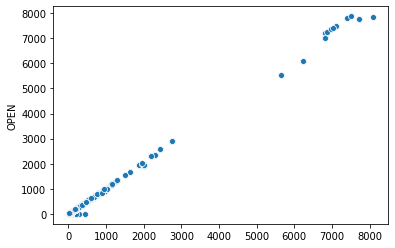

In [217]:
sn.scatterplot(x=linear_pred,y=y_test)

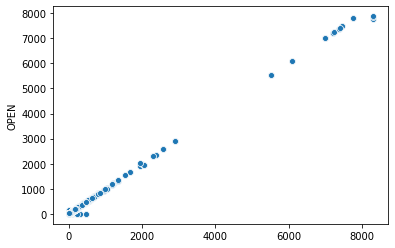

In [218]:
sn.scatterplot(x=Knn_predict,y=y_test)

In [41]:
len(p)

14905

In [535]:
out = X_test.join(scrip)

In [536]:
out = out.join(result)

In [537]:
out.tail()

,HIGH,LOW,CURRENT,SCRIP,OPEN
128923,22.50,21.77,22.45,SSGC-JAN,21.94
128924,196.00,190.21,195.63,SEARL-JAN,190.25
128925,26.01,24.80,26.01,TRG-JAN,24.99
128926,172.50,170.00,172.29,UBL-JAN,171.00
128927,17.10,16.22,17.02,UNITY-JAN,16.30


In [477]:
len(out['SCRIP'].unique())

711

In [452]:
pre = pd.DataFrame(p)

In [466]:
pre.tail()

,0
14303,22.04
14304,192.90
14305,24.75
14306,171.00
14307,16.22


In [462]:
# out.join(pre)

In [538]:
pre.to_csv('out.csv',index=None)

In [454]:
# In =pd.read_csv('output.csv')

In [539]:
dis = pd.read_csv('out.csv')
# 

In [540]:
len(dis)

14308

In [468]:
# merges_result = In.join(dis)

In [469]:
# merges_result.head()

In [470]:
# merges_result.tail()

In [471]:
# merges_result['SCRIP']

In [472]:
# dataRows

In [54]:
import seaborn as sn

In [473]:
# Z = pd.DataFrame(X_test['LOW'].unique().copy())

In [474]:
# Z.head()

Populating the interactive namespace from numpy and matplotlib


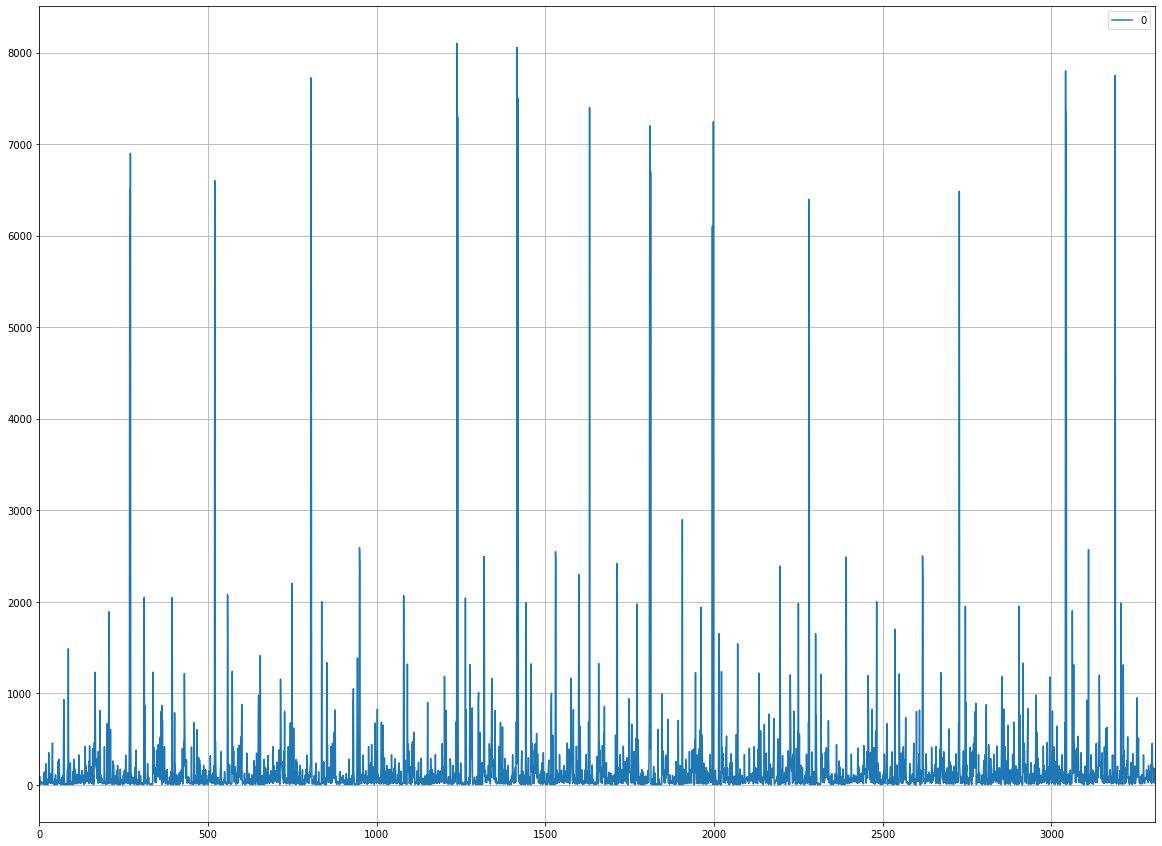

In [164]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
# %matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)   # Change the size of plots
 
Z.plot(grid = True) # Plot the adjusted closi9

In [149]:
df.head()

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,5.78,5.65,5.79,5.51,5.61,-0.17,45500.0
2,Ghandhara Nissan Ltd.,48.58,48.60,49.39,48.00,48.28,-0.30,58500.0
4,Ghani Automobile Industries Ltd.,3.75,3.75,3.84,3.71,3.74,-0.01,16500.0
6,Hino Pak Motor Limeted.,290.00,290.00,290.00,281.50,281.75,-8.25,600.0
8,Honda Atlas Cars (Pak) Ltd.,136.10,136.25,138.00,134.50,135.71,-0.39,62400.0


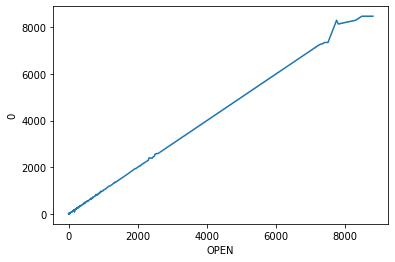

In [56]:
sn.lineplot(x=merges_result['OPEN'],y=merges_result['0'])

In [479]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, p))
rms


13.679193112767377

In [124]:
import matplotlib.pyplot as plt

In [125]:
plt.figure(figsize=(16,8))


<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

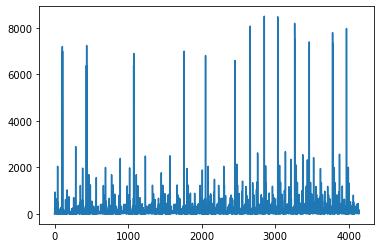

In [129]:
plt.plot(df['CURRENT'].unique(), label='Close Price history')

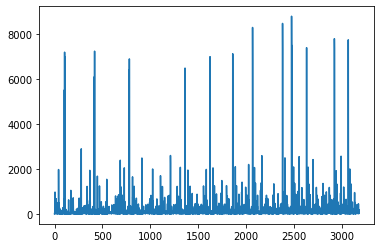

In [130]:
plt.plot(df['OPEN'].unique(), label='Close Price history')

In [144]:
# plt.plot(df['CURRENT'].unique(), label='Close Price history')
# len(merges_result['SCRIP'])

In [146]:
# sn.lineplot(x=merges_result['OPEN'],y=merges_result["SCRIP"])

In [148]:
# ax = df.pivot("SCRIP", "OPEN", "CURRENT").plot()
# ax.ticklabel_format(axis='x', useOffset=False)
# plt.show()

In [110]:
rms

10.712620591873787

In [108]:
df.tail()

,SCRIP,LDCP,OPEN,HIGH,LOW,CURRENT,CHANGE,VOLUME
122893,TRG-JAN,23.33,22.80,23.20,22.17,22.17,-1.16,6368000.0
122894,UBL-JAN,169.14,169.00,169.00,166.20,166.20,-2.94,7000.0
122895,UBL-DEC,169.14,168.00,168.00,165.01,165.01,-4.13,5500.0
122896,UNITY-DEC,14.83,14.70,14.94,13.92,14.01,-0.82,13053500.0
122897,UNITY-JAN,14.83,14.85,14.89,14.10,14.19,-0.64,6244000.0


In [58]:
df = pd.read_csv('Stock.csv',names=filter)

In [89]:
scrip = pd.DataFrame(df['SCRIP'])

In [90]:
change = pd.DataFrame(df['CHANGE'])

In [94]:
union=scrip.join(change)

In [98]:
union

,SCRIP,CHANGE
0,Dewan Farooque Motors Limited [ DEFAULTER SEGM...,-0.17
2,Ghandhara Nissan Ltd.,-0.30
4,Ghani Automobile Industries Ltd.,-0.01
6,Hino Pak Motor Limeted.,-8.25
8,Honda Atlas Cars (Pak) Ltd.,-0.39
...,...,...
122893,TRG-JAN,-1.16
122894,UBL-JAN,-2.94
122895,UBL-DEC,-4.13
122896,UNITY-DEC,-0.82


In [101]:
recomended_stocks = []

In [102]:
recomended_stocks.append(union[union['CHANGE'] > 2.0])

In [314]:
# recomended_stocks[0]

,SCRIP,CHANGE
20,Baluchistan Wheels Ltd.(XD),2.20
60,Lucky Cement Limited.,2.28
108,Wah Noble Chemicals Ltd.(XD),2.77
180,Engro Corporation Limited.,8.02
182,Engro Fertilizers Limited.,3.07
...,...,...
122643,Bata Pakistan Ltd.,11.88
122715,Al-Abbas Sugar Mills Ltd.,4.90
122762,Sapphire Fibres Mills Ltd.,16.50
122778,Janana De Malucha Tex Mills.,3.19


In [ ]:
sns.lineplot(x=recomended_stocks)

In [319]:
# df["OPEN"]

In [315]:
len(df)

67078

In [541]:
# df = df.dropna()

In [31]:
# out.to_csv('output.csv',index=None)

In [45]:
# y_test.head()

In [43]:
# y_test.head()

In [44]:
# predict.head()

In [84]:
# pd.concat([y_test, predict], ignore_index=True,axis=1)

In [85]:
# predict = pd.DataFrame(p)

In [86]:
# X_test.head()

In [87]:
# con = X_test.join(y_test)

In [88]:
# con.head()

In [89]:
# p = pd.DataFrame(p)

In [90]:
# con = con.join(p)

In [91]:
# p = p.join(X_test)

In [92]:
# p.head()

In [93]:
# p = p.merge(X_test)

In [94]:
# p.head()

In [278]:

# for i in df['SCRIP']:
#     if("Honda Atlas Cars (Pak) Ltd." in i):
#         print(df['OPEN'])
#     else:
#         print('0')

In [281]:
# df.head()

In [166]:
import numpy as np

In [232]:
len(scrip)

67078

In [268]:
# frame = np.array(df)
# df_t= pd.DataFrame(df.transpose(),index=None)
# # df_t = df.drop('SCRIP',axis=1)


In [311]:
# len(df_t)

In [272]:
# df_t = pd.DataFrame(df_t.transpose())


In [308]:
# df_t['SCRIP']
# df_t.tail()

In [309]:
# for i in df_t['SCRIP']:
#     if('Ghandhara Nissan Ltd.' in df_t['SCRIP']):
        
        

In [310]:
# df_t[0][0]

In [484]:
regression.predict([[5.79,5.51,5.61]])

array([5.65])

In [482]:
regression.predict([[49.39,48,48.28]])

array([48.6])

In [483]:
regression.predict([[0.94,0.89,0.90]])

array([0.946])

In [481]:
regression.predict([[2.91,2.6,2.64]])

array([2.876])

In [480]:
regression.predict([[245.0,243.89,244.90]])

array([244.4])

In [392]:
regression.predict([[3,2.4,2.42]])

array([2.56])

In [391]:
regression.predict([[25.99,24.55,25.69]])

array([24.99])

In [485]:
len(p)

14308

In [35]:
regression.predict([[1.45,1.36,1.37]])

array([1.39])

In [36]:
regression.predict([[25.62,24.81,25.62]])

array([25.49])

In [62]:
import numpy as np


In [35]:
# np.concatenate(scrip,p)
# scrip1 = pd.DataFrame(scrip)

In [36]:
# array = np.array(regression.predict(d))

In [37]:
# array

In [38]:
# prediction = pd.DataFrame(array)

In [39]:
# prediction

In [40]:
# dam = scrip.join(prediction)

In [41]:
# len(scrip1)
# len(prediction)

In [498]:
# d.head()

In [42]:
# dam.head()

In [43]:
# actual =  pd.DataFrame(prediction)

In [44]:
# dam = dam.join(actual)

In [45]:
# dam.head()

In [46]:
# pre[0:5]

In [47]:
# result

In [45]:
import seaborn as sn

In [50]:
# import matplotlib.pyplot as plt
# plt.gcf().set_size_inches(22, 15, forward=True)

# start = 0
# end = -1

# real = plt.plot(y_test[start:end], label='real')
# pred = plt.plot(p[start:end], label='predicted')

# plt.legend(['Real', 'Predicted'])

# plt.show()

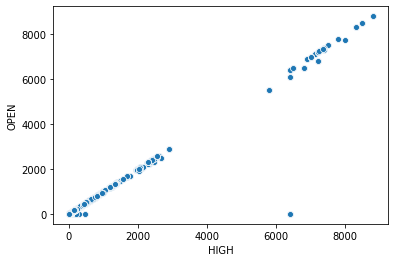

In [106]:
sn.scatterplot(x=d['HIGH'],y=result)

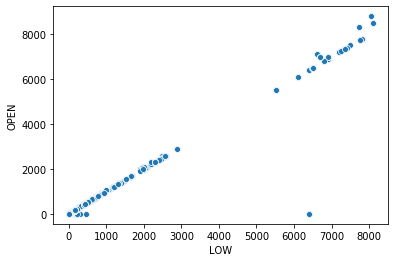

In [107]:
sn.scatterplot(x=d['LOW'],y=result)

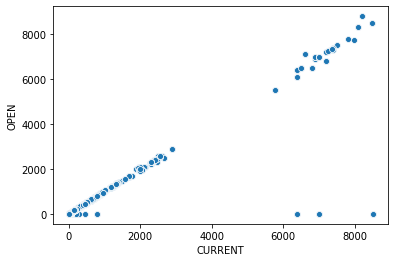

In [109]:
sn.scatterplot(x=d['CURRENT'],y=result)

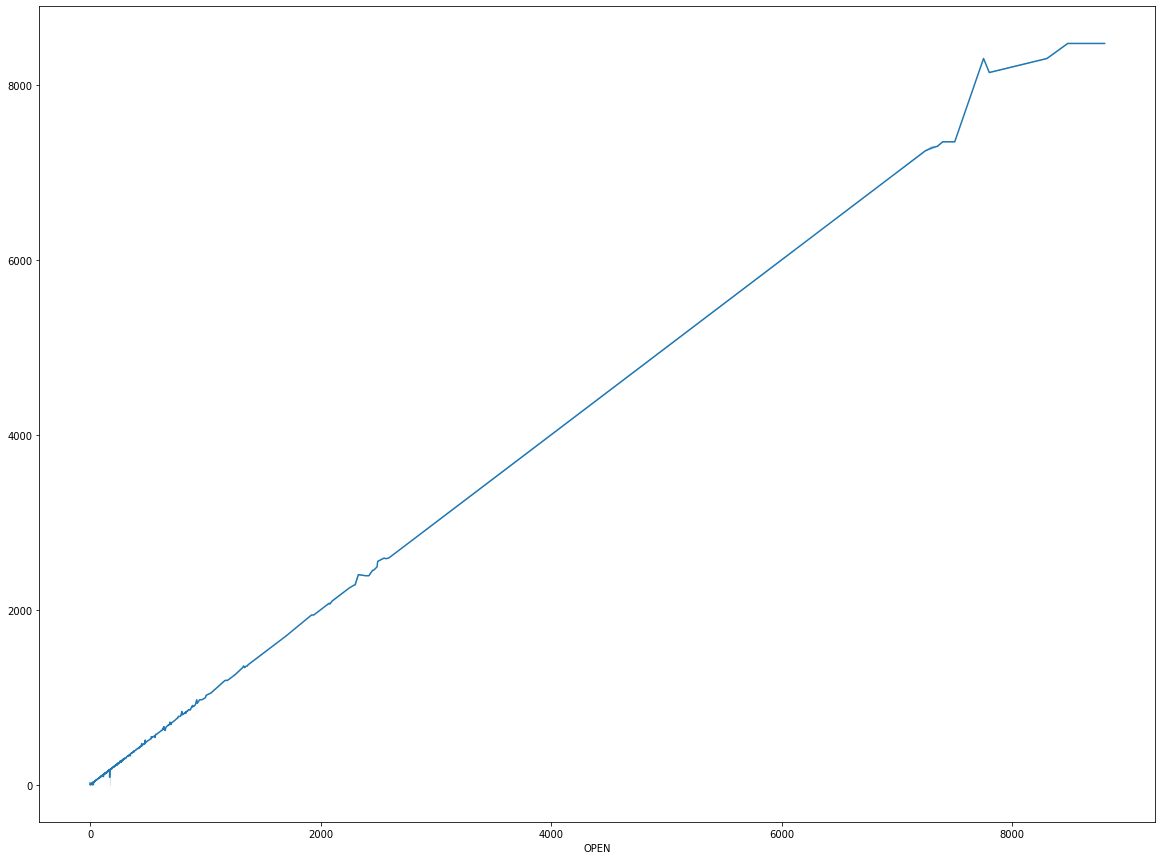

In [219]:
sn.lineplot(x=y_test,y=p)

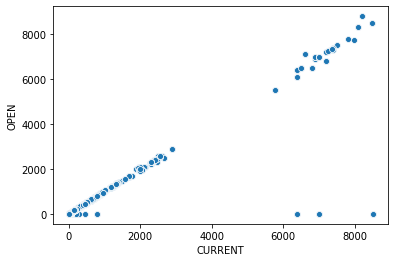

In [46]:
sn.scatterplot(x=d['CURRENT'],y=result)

In [225]:
df_t[2]

SCRIP      Ghandhara Nissan Ltd. 
LDCP                        48.58
OPEN                         48.6
HIGH                        49.39
LOW                            48
CURRENT                     48.28
CHANGE                       -0.3
VOLUME                      58500
Name: 2, dtype: object

In [49]:
# url ="https://www.psx.com.pk/market-summary/"

# ss = requests.get(url)
# print(ss)
# obj = BeautifulSoup(ss.content,'lxml')

<Response [200]>


In [213]:
# data = obj.findAll("div",{"class":"table-responsive"})

In [51]:
# da = obj.find_all('td')

In [214]:
# da[3568]

In [58]:
# open_index = 40
# open_values = []
# for open_index in range(len(da)):
#     open_values.append(da[open_index])
#     open_index = open_index + 8
    

In [215]:
# open_values

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pre = model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.965610696248775

In [48]:
pre[0:6]

array([ 13.1777095 ,  13.79617267, 238.00192268, 107.16540827,
        43.5452211 , 190.72006934])

In [49]:
y_test.head()

16450     11.60
69671     11.87
90628    241.00
6566     104.01
70384     41.65
Name: OPEN, dtype: float64

In [226]:
len(pre)

13416

In [55]:
# np.random.shuffle(d)

In [62]:
# from sklearn.model_selection import KFold
# # data sample
# # data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # prepare cross validation
# kfold = KFold(5, True)
# # enumerate splits
# for train, test in kfold.split(d):
#     print('train: %s, test: %s' % (d[train], d[test]))

In [303]:
# d = d.join(result)

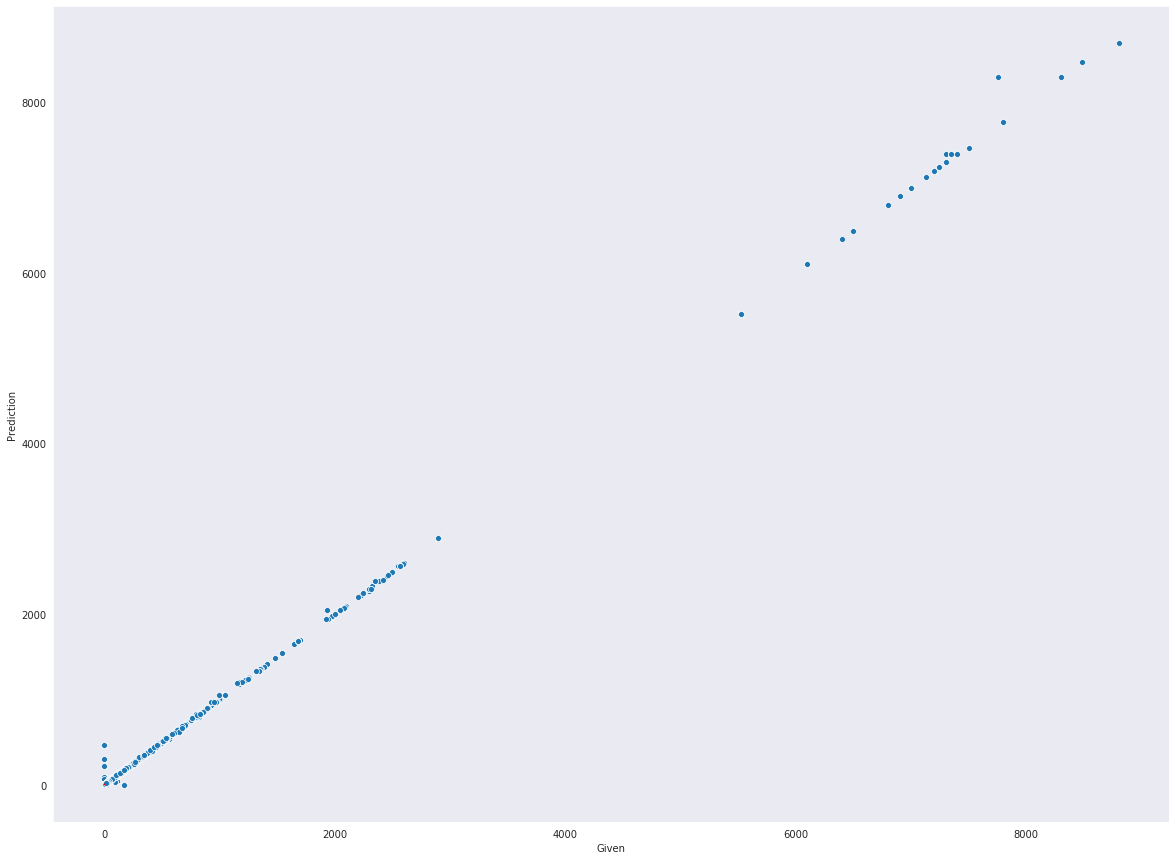

In [545]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, p)
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [345]:
arrayofRequest= []
# prices=[]
# location=[]
# columns=['Price', 'Location']
# df = pd.DataFrame(columns=columns)
import requests
from bs4 import BeautifulSoup
# for i in range(0,2):

arrayofRequest.append("https://www.psx.com.pk/market-summary/")
request = requests.get(arrayofRequest[0])

soupobj= BeautifulSoup(request.content,"lxml")
#     print(soupobj.prettify())

links =soupobj.find_all('div',{'class':'table-responsive'})

dataRows=[]
scr = []
for i in range(1,35):
    x=str(links[i]).split("<!--  <td></td> -->")
    for j in range(1,len(x)):
        
        data =x[j].split("\n")
        data.pop(0)
#         companyName = data[0].split(">")[1].split("<")[0]
#         ldcp=data[1].split(">")[1].split("<")[0]
        opening=data[2].split(">")[1].split("<")[0]
        scrip = data[0].split(">")[1].split("<")[0]
        scr.append(scrip)
        dataRows.append(opening)
        
    
# opening

# dataRows


In [333]:
pd.DataFrame(dataRows)

,0
0,365.01
1,380.00
2,7.20
3,134.40
4,76.42
...,...
372,21.94
373,190.25
374,24.99
375,171.00


In [548]:
from sklearn.model_selection import KFold

In [589]:
kfold = KFold(n_splits=4)

In [590]:
kf.get_n_splits(d,result)

4

In [591]:
print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


In [592]:
for train_index,test_index in kf.split(d,result):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train , X_test = d[train_index] ,d[test_index]
    Y_train ,Y_test = result[train_index],result[test_index]

TRAIN: [17885 17886 17887 ... 71535 71536 71537] TEST: [    0     1     2 ... 17882 17883 17884]


KeyError: "None of [Int64Index([17885, 17886, 17887, 17888, 17889, 17890, 17891, 17892, 17893,\n            17894,\n            ...\n            71528, 71529, 71530, 71531, 71532, 71533, 71534, 71535, 71536,\n            71537],\n           dtype='int64', length=53653)] are in the [columns]"

In [562]:
# merges_result.head()
dtype(result)

dtype('float64')

In [581]:
# for k,(train,test) in enumerate(kfold.split(d,result)):
#     regression.fit(d[train],result[train])
#     regression.score(d[test],result[test])

In [586]:
# X_train[indices]
# X_train

In [593]:
train_index

array([17885, 17886, 17887, ..., 71535, 71536, 71537])

In [594]:
test_index

array([    0,     1,     2, ..., 17882, 17883, 17884])